In [24]:
% matplotlib inline
import math

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString

base1 = Polygon([
    (-32.1665052195, 244.951010361),
    (0.0, 0.0),
    (164.100332863, -6.72252704724),
    (258.444740993, 131.833417876),
    (81.6832775051, 124.859373939),
    (75.3190068965, 248.195464884),
    (-32.1665052195, 244.951010361),
])

base2 = Polygon([
    (-49.4396391714, 329.180218029),
    (-92.9129195885, 247.064021685),
    (-57.9893698290, 147.064434513),
    (10.0375541578, 123.960950894),
    (42.1257258497, 41.8152313633),
    (0.0, 0.0),
    (243.639444075, -12.0928970791),
    (165.344305147, 76.4704567905),
    (128.122025984, 171.451444998),
    (75.3190068965, 248.195464884),
    (11.3210810255, 302.371185501),
    (-16.9165100634, 338.309937796),
    (-49.4396391714, 329.180218029)
])

base3 = Polygon([
    (-1.51418765128, -3.10820900539),
    (264.175873958, -3.10820900539),
    (264.175873958, 263.865379471),
    (-1.51418765128, 263.865379471),
    (-1.51418765128, -3.10820900539)
])

base4 = Polygon([
    (7.47050042245, 4.59295220067),
    (65.2292094678, 301.087658634),
    (135.823187190, 337.026410929),
    (289.846411311, 369.114582620),
    (465.689592183, 347.294625870),
    (595.325805818, 225.359573441),
    (603.026967024, 88.0221985996),
    (440.019054829, -6.95878960841),
    (300.114626252, -74.9857135952),
    (7.47050042245, 4.59295220067),
])

base5 = Polygon([
    (9.73997200653, -0.429771980603),
    (32.7216291224, 291.150002677),
    (126.084611155, 396.003813268),
    (252.483725293, 434.785359651),
    (263.974553851, 351.476852606),
    (355.901182314, 253.804809863),
    (582.845046333, 207.841495632),
    (627.372006995, 46.9698958208),
    (465.064053614, 6.75199586810),
    (222.320300328, 146.078292133),
    (118.902843307, 35.4790672629),
    (9.73997200653, -0.429771980603)
])
series = [base1, base2, base3, base4, base5]


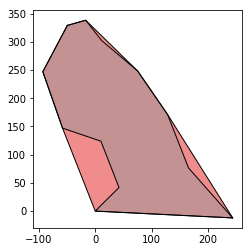

In [79]:
base = base2
gpd.GeoSeries([base.convex_hull, base]).plot()

(10.0375541578, 123.960950894)
(42.1257258497, 41.8152313633)
(165.344305147, 76.4704567905)
(11.3210810255, 302.371185501)


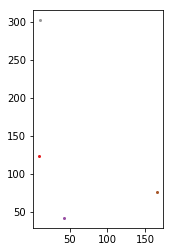

In [72]:
boundary = base.boundary
point_list = []
for coord in boundary.coords:
    if not base.convex_hull.boundary.contains(Point(coord)):
        print(coord)
        point_list.append(Point(coord))
# point_list.append(base5)
gpd.GeoSeries(point_list).plot()

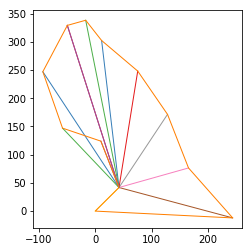

In [75]:
centroid = point_list[1]
line_list = []
for coord in base.boundary.coords:
    line = LineString([coord, centroid])
    line_list.append(line)
# centroid = point_list[1]
# for coord in base.boundary.coords:
#     line = LineString([coord, centroid])
#     line_list.append(line)
line_list.append(base.boundary)
gdf = gpd.GeoSeries(line_list)
gdf.plot()